In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = "/content/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
d1 = pd.read_csv(path1, engine='python',encoding='latin1')

d1 = pd.DataFrame({'Regionid':d1['RegionID'],
                  'SizeRank': d1['SizeRank'],
                  'Zip':d1['RegionName'],
                  'State': d1['State'],
                  'City': d1['City'],
                  'Metro': d1['Metro'],
                  'CountyName': d1['CountyName'],
                  '2017-12-31': d1['2017-12-31'],
                  '2018-12-31': d1['2018-12-31'],
                  '2019-12-31': d1['2019-12-31'],
                  '2020-12-31': d1['2020-12-31'],
                  '2021-12-31': d1['2021-12-31'],})

for d in range(len(d1)):
    if d1['State'][d] != 'TN':
        d1 = d1.drop([d])
for e in d1.index:
    if d1['City'][e] != 'Nashville':
        d1 = d1.drop([e])

avg_pv = []
for h in d1.index:
    avg_pv.append((d1['2017-12-31'][h]+d1['2018-12-31'][h]+d1['2019-12-31'][h]+d1['2020-12-31'][h]+d1['2021-12-31'][h])/5)

zips = []
for e in d1.index:
  zips.append(str(d1['Zip'][e]))

d1 = pd.DataFrame({
                  'Zip': zips,
                  'Property Value': avg_pv})
d1 = d1.convert_dtypes()

print(len(d1))


25


In [ ]:
path2 = "/content/GenStats-Nashville - Income Nash.csv"
d2 = pd.read_csv(path2, engine='python',encoding='latin1')

# need to convert census tract to str
ct = []
for a in d2['Census Tract']:
    ct.append(str(a))

d2 = d2.convert_dtypes()

# mi = []
# for b in d2['Median Income']:
#     mi.append(b)
# mhinc_mean = np.mean(mi)

# minc = standardized_norm(mi, mhinc_mean, standard_dev(mi, mhinc_mean) )

d2 = pd.DataFrame({'Census Tract ID': ct, 'Median Income': d2['Median Income']})
d2
# print(d2.dtypes)

Census Tract ID  Median Income
0       47037010103          68019
1       47037010104         102675
2       47037010105          69525
3       47037010106          71656
4       47037010201          70750
..              ...            ...
163     47037019402          94065
164     47037019501          63523
165     47037019502          69907
166     47037019503          91917
167     47037019600          60795

[168 rows x 2 columns]

In [ ]:
path3 = "/content/GenStats-Nashville - Diversity Index.csv"
d3 = pd.read_csv(path3)

# arr = np.array([d3['D-Index']])
# ar = preprocessing.normalize(arr)
d3 = pd.DataFrame({'Census Tract ID': ct, 'Diversity Index': d3['D-Index']})
d3 = d3.convert_dtypes()

display(d3)

# # need to convert census tract to str

Census Tract ID  Diversity Index
0       47037010103            23.38
1       47037010104            28.01
2       47037010105            46.07
3       47037010106            46.84
4       47037010201            62.44
..              ...              ...
163     47037019402            32.01
164     47037019501            37.88
165     47037019502            47.04
166     47037019503            27.49
167     47037019600            64.86

[168 rows x 2 columns]

In [ ]:
path4 = "/content/GenStats-Nashville - DemoStats.csv"
d4 = pd.read_csv(path4)
ct2 = []
for c in d4['Census Tract']:
    ct2.append(str(c))
d4 = pd.DataFrame({'Census Tract ID': ct2, 'POC %': d4['POC_perc']})
d4

Census Tract ID  POC %
0       47037010103  13.01
1       47037010104  16.19
2       47037010105  77.73
3       47037010106  76.92
4       47037010201  57.00
..              ...    ...
164     47037019402  18.07
165     47037019501  22.63
166     47037019502  29.28
167     47037019503  15.19
168     47037019600  50.86

[169 rows x 2 columns]

In [ ]:
path6 = "/content/GenStats-Nashville - OppSec.csv"
d6 = pd.read_csv(path6)
ct4 = []
for g in d6.index:
    ct4.append(str(d6['Census Tract ID'][g]))
d6 = pd.DataFrame({'Census Tract ID': ct4, 'Risk': d6['Risk']})
d6

Census Tract ID  Risk
0       47037010401     1
1       47037012600     1
2       47037013600     1
3       47037013701     1
4       47037013702     1
..              ...   ...
185     47037019117     0
186     47037019118     0
187     47037019119     0
188     47037019120     0
189     47037019121     0

[190 rows x 2 columns]

In [ ]:
path7 = "/content/GenStats-Nashville - DomRace.csv"
d7 = pd.read_csv(path7)
ct5 = []
for g in d7.index:
    ct5.append(str(d7['Census Tract ID'][g]))
d7 = pd.DataFrame({'Census Tract ID': ct5, 'DomRace': d7['Race']})
d7

Census Tract ID  DomRace
0       47037010103        1
1       47037010104        1
2       47037010105        2
3       47037010106        2
4       47037010201        1
..              ...      ...
165     47037019402        1
166     47037019501        1
167     47037019502        1
168     47037019503        1
169     47037019600        1

[170 rows x 2 columns]

In [ ]:
path5 = "/content/ZIP_TRACT_122020.xlsx"
d5 = pd.read_excel(path5)

def dtype_conversion2(df, col):

    df[col] = df[col].astype(str)
    for i, cell in enumerate(df[col]):
        size = len(cell)
        if size < 5:
            df[col][i] =  ((5-size) * '0') + cell
    return df.convert_dtypes()

ct3 = []
for g in d5.index:
    ct3.append(str(d5['TRACT'][g]))
d5 = dtype_conversion2(d5, 'ZIP')

d5 = pd.DataFrame({'Zip': d5['ZIP'], 'Census Tract ID': ct3})
print(d5.dtypes)

<ipython-input-22-23edee3618e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] =  ((5-size) * '0') + cell


Zip                string
Census Tract ID    object
dtype: object


In [ ]:
di_mi = pd.merge(d2, d3, on=["Census Tract ID"])
gen_facts = pd.merge(di_mi, d4, on=['Census Tract ID'])
gen_facts = pd.merge(gen_facts, d6, on=['Census Tract ID'])
gen_facts = pd.merge(gen_facts, d7, on=['Census Tract ID'])
display(gen_facts)

Census Tract ID  Median Income  Diversity Index  POC %  Risk  DomRace
0       47037010103          68019            23.38  13.01     0        1
1       47037010104         102675            28.01  16.19     0        1
2       47037010105          69525            46.07  77.73     0        2
3       47037010106          71656            46.84  76.92     0        2
4       47037010201          70750            62.44  57.00     0        1
..              ...            ...              ...    ...   ...      ...
185     47037019502          69907            47.04  29.28     0        1
186     47037019503          91917            27.49  15.19     0        1
187     47037019503          91917            27.49  15.19     0        1
188     47037019600          60795            64.86  50.86     0        1
189     47037019600          60795            64.86  50.86     0        1

[190 rows x 6 columns]

In [ ]:
gen_facts_zip = pd.merge(gen_facts, d5, on=["Census Tract ID"])
# gen_facts_zip = gen_facts_zip.groupby('Zip')
# display(gen_facts_zip.first())

pv_gen_stats = pd.merge(gen_facts_zip, d1, on=["Zip"])
# gen_facts_zip
pv_gen_stats
print(len(set(gen_facts_zip['Zip'])))
print(len(set(pv_gen_stats['Zip'])))

42
23


In [ ]:
from pandas.core.dtypes.cast import convert_dtypes
zc_dict = {}
cc = 1
for z in set(gen_facts_zip['Zip']):
  if z not in zc_dict:
    zc_dict[z] = cc
    cc += 1

zc = []
for zd in gen_facts_zip['Zip']:
  zc.append(zc_dict[zd])

gen_facts_zip['Z-Color'] = zc

gen_facts_zip = gen_facts_zip.convert_dtypes()

In [ ]:

colours = ['blue', 'yellow', 'green', 'red', 'black','pink',
            'orange', 'gold', 'cyan', 'grey', 'pale green', 'purple',
           'maroon', 'darkkhaki', 'lime', 'darkgoldenrod', 'peachpuff'
           'lightseagreen', 'snow', 'magenta', 'lightsteelblue','yellowgreen']
pc_dict = {}
cc = 1
carr = 0
for p in set(pv_gen_stats['Zip']):
  if p not in pc_dict:
    pc_dict[p] = cc
    cc += 1

pc = []
for pvc in pv_gen_stats['Zip']:
  pc.append(pc_dict[pvc])

pv_gen_stats['P_Color'] = pc




pv_gen_stats = pv_gen_stats.convert_dtypes()
pv = pv_gen_stats.drop(['Census Tract ID'], axis=1)
pvv = pv
genz = gen_facts_zip.drop(['Census Tract ID'], axis=1)
no_zip = pv_gen_stats.drop(['Zip'], axis=1)


# zip_dict1 = {}
# y1 = 0
# for x1 in genz.index:
#   if genz['Zip'][x1] not in zip_dict1:
#     zip_dict1[genz['Zip'][x1]] = [x1, y1+1]
#     y1 = 0
#   else:
#     ind = zip_dict1[genz['Zip'][x1]][0]
#     tot = zip_dict1[genz['Zip'][x1]][1]

#     genz['Median Income'][ind] += genz['Median Income'][x1]
#     genz['Diversity Index'][ind] += genz['Diversity Index'][x1]
#     genz['Z-Color'][ind] += genz['Z-Color'][x1]

#     zip_dict1[genz['Zip'][x1]][1] += 1

#     genz = genz.drop([x1])

# for vals in zip_dict1.values():
#    indx = vals[0]
#    total = vals[1]

#    genz['Median Income'][indx] = int(genz['Median Income'][indx] / total)
#    genz['Diversity Index'][indx] /= total
#    genz['Z-Color'][indx] /= total

# # display(genz)

zip_dict = {}
y = 0
for x in pv.index:
  if pv['Zip'][x] not in zip_dict:
    zip_dict[pv['Zip'][x]] = [x, y+1]
    y = 0
  else:
    ind = zip_dict[pv['Zip'][x]][0]
    tot = zip_dict[pv['Zip'][x]][1]

    pv['Median Income'][ind] += pv['Median Income'][x]
    pv['Diversity Index'][ind] += pv['Diversity Index'][x]
    pv['Property Value'][ind] += pv['Property Value'][x]
    pv['P_Color'][ind] += pv['P_Color'][x]

    zip_dict[pv['Zip'][x]][1] += 1

    pv = pv.drop([x])

for valss in zip_dict.values():
   index = valss[0]
   totall = valss[1]

   pv['Median Income'][index] = int(pv['Median Income'][index] / totall)
   pv['Diversity Index'][index] /= totall
   pv['Property Value'][index] /= totall
   pv['P_Color'][index] /= totall

# display(pv)
display(no_zip)
cti = no_zip['Census Tract ID']
noz = no_zip

zp = pv['Zip']
zp2 = genz['Zip']
# pv_gen_stats

Census Tract ID  Median Income  Diversity Index  POC %  Risk  DomRace  \
0       47037010103         170694            51.39  13.01     0        1   
1       47037010104         102675            28.01  16.19     0        1   
2       47037013100          84013             58.6  40.82     0        1   
3       47037010103          68019            23.38  13.01     0        1   
4       47037010104         102675            28.01  16.19     0        1   
..              ...            ...              ...    ...   ...      ...   
239     47037018407         117740             30.1  16.83     0        1   
240     47037018408         111500            27.15  14.99     0        1   
241     47037018409          71458            36.41  21.92     0        1   
242     47037018410          60141            40.76  24.45     0        1   
243     47037018601         208236            16.05   8.58     0        1   

     Property Value  P_Color  
0     520673.135166        8  
1     260336.567583        4  
2     260336.567583        4  
3      270643.12701        3  
4      270643.12701        3  
..              ...      ...  
239   347227.732327        1  
240   347227.732327        1  
241   347227.732327        1  
242   347227.732327        1  
243   347227.732327        1  

[244 rows x 8 columns]

In [ ]:
no_zip = no_zip.drop(['Census Tract ID'], axis=1)
f = [	'Median Income',	'Diversity Index',	'Property Value', 'POC %']
no_zip[f] = (no_zip[f]-no_zip[f].mean()) / no_zip[f].std()
no_zip['Census Tract ID'] = cti

no_zip = no_zip.convert_dtypes()
no_zip


Median Income  Diversity Index     POC %  Risk  DomRace  Property Value  \
0         2.264501         0.190999 -1.251307     0        1        1.199592   
1         0.587395        -1.136593 -1.123305     0        1       -0.667417   
2         0.127257         0.600406 -0.131892     0        1       -0.667417   
3        -0.267098          -1.3995 -1.251307     0        1       -0.593504   
4         0.587395        -1.136593 -1.123305     0        1       -0.593504   
..             ...              ...       ...   ...      ...             ...   
239       0.958844        -1.017916 -1.097544     0        1       -0.044276   
240       0.804988        -1.185427 -1.171608     0        1       -0.044276   
241      -0.182305        -0.659614  -0.89266     0        1       -0.044276   
242      -0.461342        -0.412607 -0.790821     0        1       -0.044276   
243       3.190153        -1.815721 -1.429625     0        1       -0.044276   

     P_Color   latitude   longitude Census Tract ID  
0          8  14.684337  121.126492     47037010103  
1          4  14.684337  121.126492     47037010104  
2          4  14.684337  121.126492     47037013100  
3          3  14.684337  121.126492     47037010103  
4          3  14.684337  121.126492     47037010104  
..       ...        ...         ...             ...  
239        1  14.684337  121.126492     47037018407  
240        1  14.684337  121.126492     47037018408  
241        1  14.684337  121.126492     47037018409  
242        1  14.684337  121.126492     47037018410  
243        1  14.684337  121.126492     47037018601  

[244 rows x 10 columns]

In [ ]:
pv = pv.drop(['Zip'], axis=1)
f = [	'Median Income',	'Diversity Index',	'Property Value', 'POC %']
pv[f] = (pv[f]-pv[f].mean()) / pv[f].std()
pv['Zip'] = zp
pv

Median Income  Diversity Index     POC %  Risk  DomRace  Property Value  \
0         0.176832        -0.663628 -1.116247     0        1       -0.681145   
3        -0.144562        -0.056846 -1.116247     0        1       -0.609507   
10       -0.808346         -0.18091  1.140228     0        2        -0.89555   
17       -0.044441         0.447271  1.111988     0        2       -0.816915   
32       -0.895691         1.457041  0.417473     0        1       -0.939661   
42       -0.433347         0.580118  0.526252     1        1       -0.645187   
48        -0.45681           0.3538  0.486855     0        1       -0.236151   
58         0.82993         -0.08718  0.513003     0        1        0.229516   
69        -0.12949        -0.594489 -0.528071     0        1        0.075593   
79       -1.341456        -0.165315  1.518864     1        1       -0.351059   
84       -0.743848         0.609003  1.531416     1        1        0.611922   
95       -1.173857         0.517841 -1.569843     1        1       -0.757962   
104      -0.593924         0.332921 -0.571304     0        1       -0.690628   
111      -0.347372           0.5125 -0.397327     0        1       -0.529291   
118      -0.385153         1.633938  0.848058     0        2       -0.715676   
146      -0.463044         1.035805  0.848058     0        2       -0.501411   
178      -0.750356          1.56409  0.848058     0        2       -0.883139   
188       0.385569        -0.701313   0.28359     1        1        1.693329   
201       0.113293        -0.129469  0.066729     1        1        1.058515   
209       2.123143        -1.816429  -1.13612     0        1        1.787356   
219       1.971951        -1.670031  -1.13612     0        1        2.265507   
230       2.211721        -1.729775 -1.196437     0        1        1.608727   
236       0.899257        -1.248943 -1.372855     0        1       -0.077183   

     P_Color    Zip  
0          4  37080  
3          3  37189  
10        10  37218  
17        19  37207  
32        18  37115  
42         8  37138  
48        11  37216  
58        23  37206  
69         6  37209  
79        17  37208  
84         7  37203  
95        22  37210  
104       12  37214  
111        5  37076  
118       15  37013  
146       13  37211  
178       21  37217  
188       20  37204  
201       16  37212  
209        2  37205  
219        9  37215  
230       14  37220  
236        1  37221

In [ ]:
genz = genz.drop(['Zip'], axis=1)
f2 = [	'Median Income',	'Diversity Index', 'POC %']
genz[f2] = (genz[f2]-genz[f2].mean()) / genz[f2].std()
genz['Zip'] = zp2
genz

Median Income  Diversity Index     POC %  Risk  DomRace  Z-Color    Zip
0        -0.312116        -1.353232 -1.209166     0        1       30  37072
1        -0.312116        -1.353232 -1.209166     0        1       13  37080
2        -0.312116        -1.353232 -1.209166     0        1        6  37189
3         0.481605         -1.09135  -1.08033     0        1        7  37015
4         0.481605         -1.09135  -1.08033     0        1       13  37080
..             ...              ...       ...   ...      ...      ...    ...
283       2.865516         0.008213  1.534884     0        1       36  37207
284       2.865516         0.008213  1.534884     0        1       22  37213
285       2.865516         0.008213  1.534884     0        1        4  37243
286      -0.477566         0.992956  0.324309     0        1       41  37210
287      -0.477566         0.992956  0.324309     0        1       41  37210

[288 rows x 7 columns]

##PCA for ```pv_gen-stats```



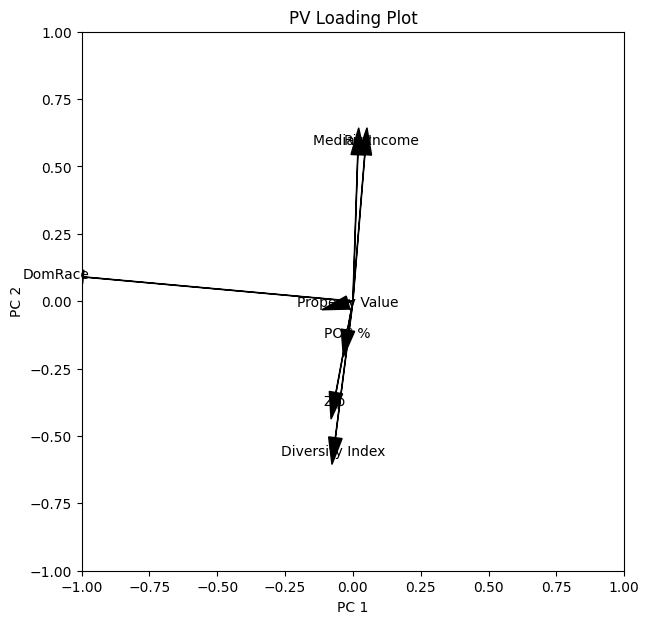

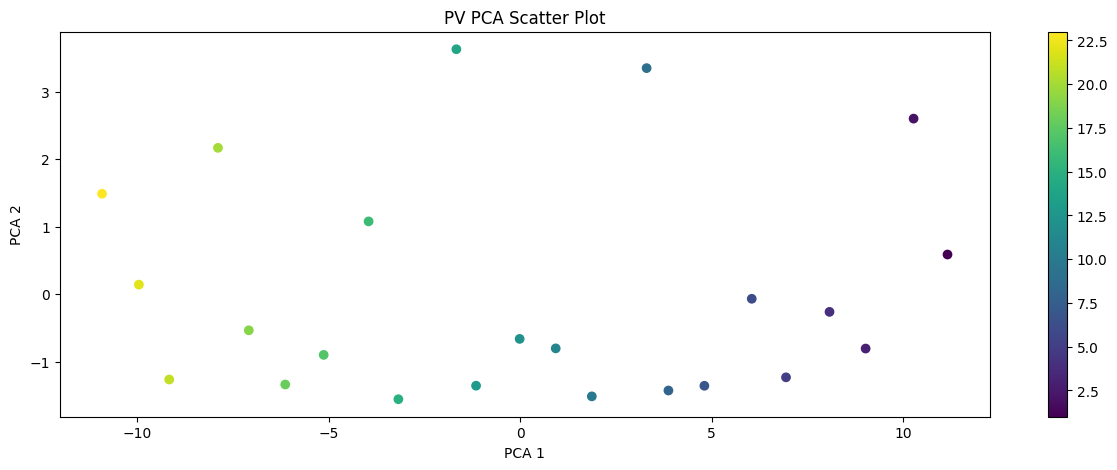

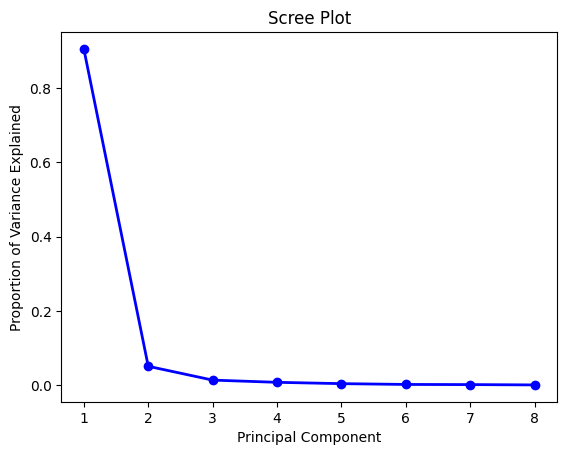

In [ ]:
#@title PCA 1 { vertical-output: true }
from sklearn.decomposition import PCA

# pca = PCA(n_components=pv_gen_stats.shape[1])
pca = PCA(n_components=pv.shape[1])
pca1 = PCA(n_components=2)

# gen_encoded = pd.get_dummies(pv_gen_stats, columns=['PreDom Race', 'Zip', 'Census Tract ID'])

gen_encoded = pd.get_dummies(pv, columns=['Zip'])
pca.fit(gen_encoded)
loadings = pca.components_

# Loading Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('PV Loading Plot')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
for i, feature in enumerate([	'Median Income',	'Diversity Index','Zip',	'Property Value', 'POC %', 'Risk', 'DomRace']):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(loadings[0, i]*1.1, loadings[1, i]*1.1, feature, ha='center', va='center')
plt.show()


# Scatter Plot
_pca = pca1.fit_transform(gen_encoded)
z_arr = np.random.randint(1,22,size=(210, 1))

fig, ax = plt.subplots(figsize=(15, 5))
# plt.scatter(_pca[:, 0], _pca[:, 1], c=pv_gen_stats['P_Color'])
plt.scatter(_pca[:, 0], _pca[:, 1], c=pv['P_Color'])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('PV PCA Scatter Plot')
plt.colorbar()
plt.show()


# Scree plot
variance_ratios = pca.explained_variance_ratio_

fig5, ax5 = plt.subplots()
ax5.plot(range(1, len(variance_ratios) + 1), variance_ratios, 'bo-', linewidth=2)
ax5.set_title('Scree Plot')
ax5.set_xlabel('Principal Component')
ax5.set_ylabel('Proportion of Variance Explained')
plt.show()


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy.stats import bartlett
from scipy.stats import levene


X = pvv[[	'Median Income',	'Diversity Index','Zip',	'Property Value', 'POC %', 'DomRace']]
y = pvv['Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create LDA model
lda = LinearDiscriminantAnalysis()

# Fit LDA model to training data
# xlda = lda.fit(X_train, y_train)
lda.fit_transform(X_train, y_train)



# print(cov_mat1==cov_mat2)
# Make predictions on test data
y_pred = lda.predict(X_test)

# Evaluate model accuracy
accuracy = lda.score(X_test, y_test)

# plt.scatter(xl[:, 0], xl[:,1], c=y, cmap='rainbow')
# plt.xlabel('LD1')
# plt.ylabel('LD2')
# plt.show()
scores = cross_val_score(lda, X, y, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', np.mean(scores))

print('Accuracy:', accuracy)

Cross-validation scores: [0.59183673 0.95918367 0.71428571 0.89795918 0.91666667]
Mean score: 0.8159863945578232
Accuracy: 0.918918918918919


## PCA for `gen_facts`

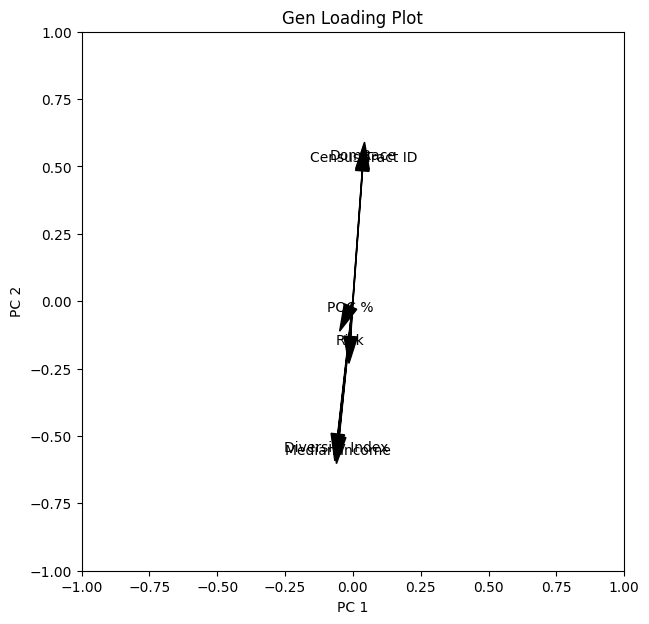

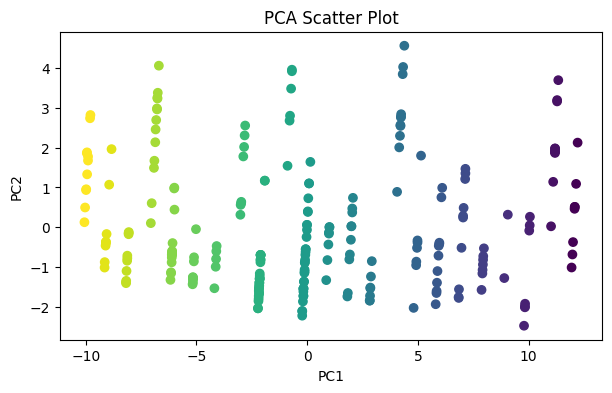

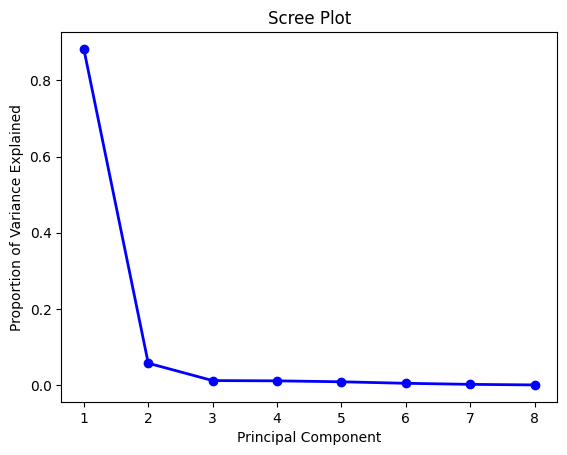

In [ ]:
#@title PCA 2 { vertical-output: true }
# pca = PCA(n_components=gen_facts_zip.shape[1])
# pca = PCA(n_components=genz.shape[1])
pca = PCA(n_components=no_zip.shape[1])
pca2 = PCA(n_components=2)

# features = ['Census Tract ID',	'Median Income',	'Diversity Index',	'PreDom Race',	'Zip']
# features = ['Median Income',	'Diversity Index',	'Zip']
features = ['Census Tract ID',	'Median Income',	'Diversity Index',	'POC %', 'Risk', 'DomRace']

gen_encoded = pd.get_dummies(no_zip, columns=[features[0]])
# gen_encoded = pd.get_dummies(genz, columns=[features[2]])

_pca = pca2.fit_transform(gen_encoded)
pca.fit(gen_encoded)
loadings = pca.components_

# Loading Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Gen Loading Plot')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(loadings[0, i]*1.1, loadings[1, i]*1.1, feature, ha='center', va='center')
plt.show()


# Scatter Plot
fig2, ax2 = plt.subplots(figsize=(7, 4))
plt.scatter(_pca[:, 0], _pca[:, 1], c=no_zip['P_Color'])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Scatter Plot')
plt.show()

# Scree plot
variance_ratios = pca.explained_variance_ratio_

fig4, ax4 = plt.subplots()
ax4.plot(range(1, len(variance_ratios) + 1), variance_ratios, 'bo-', linewidth=2)
ax4.set_title('Scree Plot')
ax4.set_xlabel('Principal Component')
ax4.set_ylabel('Proportion of Variance Explained')
plt.show()

## LDA for `gen_facts`

In [ ]:
#@title LDA 1 GEN_FACTS { vertical-output: true }
X = no_zip[[	'Median Income',	'Diversity Index',	'Property Value', 'POC %', 'DomRace']]
y = no_zip['Risk']

# X = pv[[	'Median Income',	'Diversity Index',	'Property Value', 'POC %', 'DomRace']]
# y = pv['Risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create LDA model
lda = LinearDiscriminantAnalysis()

# Fit LDA model to training data
a = lda.fit_transform(X_train, y_train)

# Make predictions on test data
y_pred = lda.predict(X_test)


# Evaluate model accuracy
accuracy = lda.score(X_test, y_test)

# plt.scatter(a[:, 0], a[:], c=y, cmap='rainbow')
# plt.xlabel('LD1')
# plt.ylabel('LD2')
# plt.show()

print('Accuracy:', accuracy)
scores = cross_val_score(lda, X, y, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', np.mean(scores))

Accuracy: 0.918918918918919
Cross-validation scores: [0.6122449  0.95918367 0.89795918 0.89795918 0.91666667]
Mean score: 0.8568027210884355


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

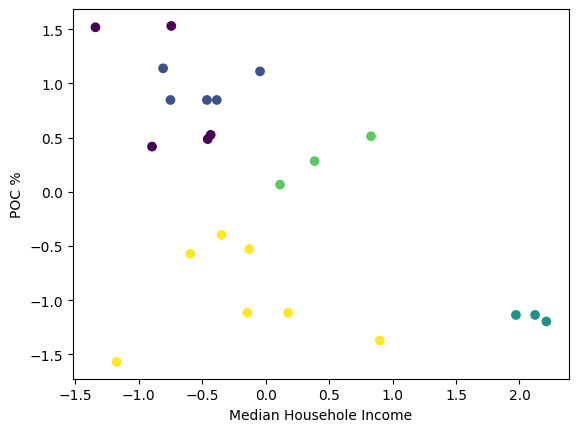

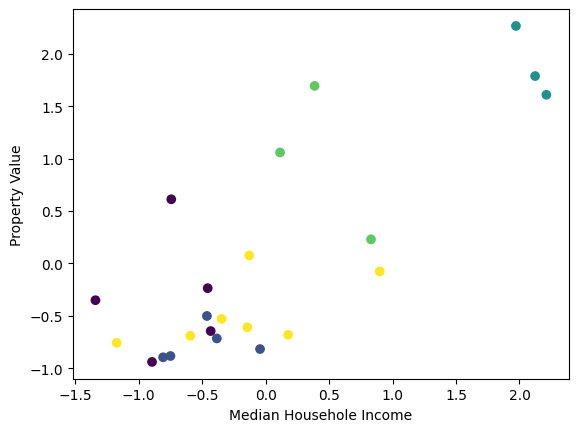

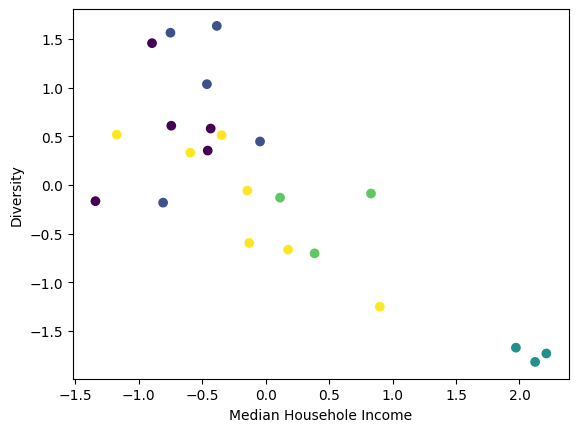

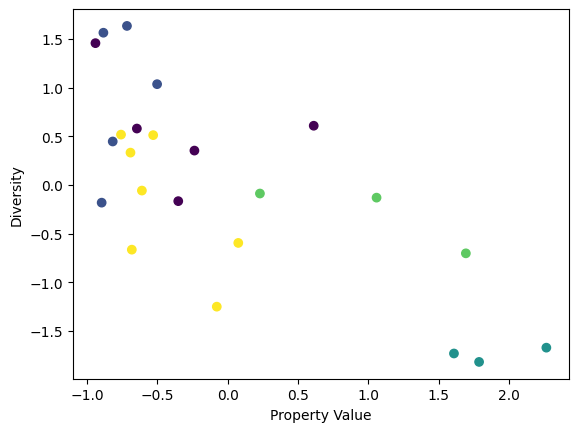

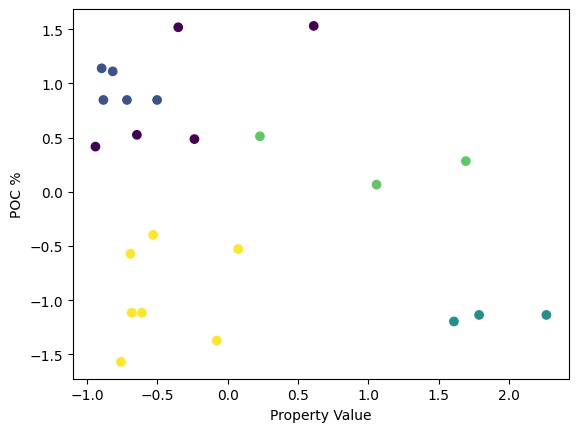

Cross-validation scores: [ -9.38025669 -10.30927517 -10.3049831   -7.9906135  -28.20268635]
Mean score: -13.237562963058684
Accuracy: 0.918918918918919


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
#@title PV KMEANS { vertical-output: true }
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
f = [	'Median Income',	'Diversity Index',	'Property Value', 'POC %', 'DomRace']

X = scaler.fit_transform(pv[f])

# Define a range of hyperparameters to test
k_values = range(2, 11)
init_methods = ['k-means++', 'random']

# Train and evaluate different models
best_score = -1
for k in k_values:
    for init in init_methods:
        model = KMeans(n_clusters=k, init=init)
        model.fit(X)
        labels = model.predict(X)
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': k, 'init': init}

# Train a final K-means model using the best hyperparameters
final_model = KMeans(**best_params)
final_model.fit(X)

pv['cluster'] = final_model.labels_

plt.scatter(pv['Median Income'], pv['POC %'], c=pv['cluster'], cmap='viridis')
plt.xlabel('Median Househole Income')
plt.ylabel('POC %')
plt.show()

plt.scatter(pv['Median Income'], pv['Property Value'], c=pv['cluster'], cmap='viridis')
plt.xlabel('Median Househole Income')
plt.ylabel('Property Value')
plt.show()

plt.scatter(pv['Median Income'], pv['Diversity Index'], c=pv['cluster'], cmap='viridis')
plt.xlabel('Median Househole Income')
plt.ylabel('Diversity')
plt.show()

plt.scatter(pv['Property Value'], pv['Diversity Index'], c=pv['cluster'], cmap='viridis')
plt.xlabel('Property Value')
plt.ylabel('Diversity')
plt.show()

plt.scatter(pv['Property Value'], pv['POC %'], c=pv['cluster'], cmap='viridis')
plt.xlabel('Property Value')
plt.ylabel('POC %')
plt.show()

scores = cross_val_score(final_model, X, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', np.mean(scores))

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# best_kmeans = grid_search.best_estimator_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

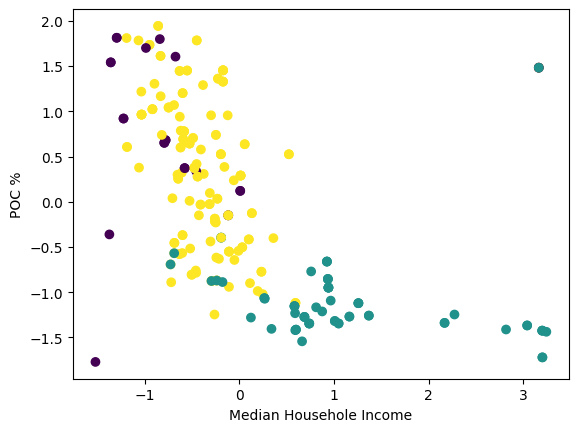

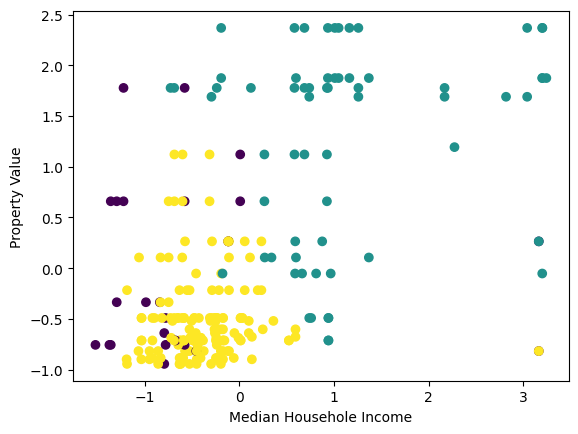

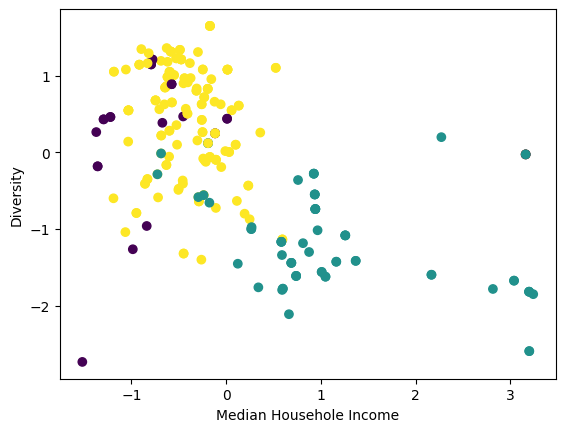

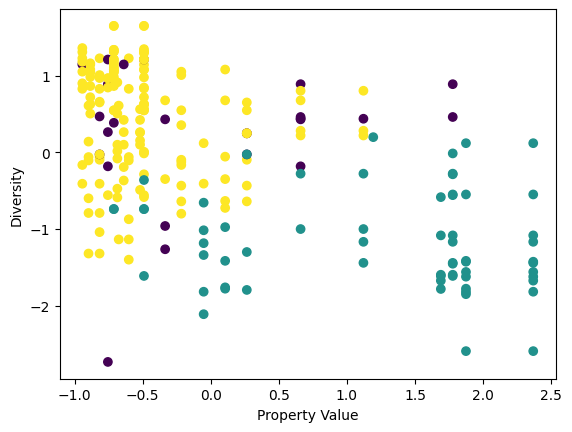

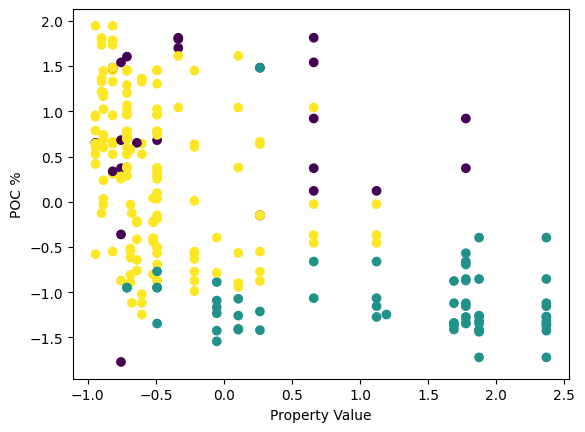

Cross-validation scores: [-408.3110761  -350.16998092 -178.69697524 -280.70852027 -480.51286879]
Mean score: -339.67988426295324
Accuracy: 0.918918918918919


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
#@title NO_ZIP KMEANS { vertical-output: true }
NO_ZIP = ""
scaler = StandardScaler()
X = scaler.fit_transform(no_zip)

# Define a range of hyperparameters to test
k_values = range(2, 11)
init_methods = ['k-means++', 'random']

# Train and evaluate different models
best_score = -1
for k in k_values:
    for init in init_methods:
        model = KMeans(n_clusters=k, init=init)
        model.fit(X)
        labels = model.predict(X)
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': k, 'init': init}

# Train a final K-means model using the best hyperparameters
final_model = KMeans(**best_params)
final_model.fit(X)

no_zip['cluster'] = final_model.labels_

plt.scatter(no_zip['Median Income'], no_zip['POC %'], c=no_zip['cluster'], cmap='viridis')
plt.xlabel('Median Househole Income')
plt.ylabel('POC %')
plt.show()

plt.scatter(no_zip['Median Income'], no_zip['Property Value'], c=no_zip['cluster'], cmap='viridis')
plt.xlabel('Median Househole Income')
plt.ylabel('Property Value')
plt.show()


plt.scatter(no_zip['Median Income'], no_zip['Diversity Index'], c=no_zip['cluster'], cmap='viridis')
plt.xlabel('Median Househole Income')
plt.ylabel('Diversity')
plt.show()

plt.scatter(no_zip['Property Value'], no_zip['Diversity Index'], c=no_zip['cluster'], cmap='viridis')
plt.xlabel('Property Value')
plt.ylabel('Diversity')
plt.show()

plt.scatter(no_zip['Property Value'], no_zip['POC %'], c=no_zip['cluster'], cmap='viridis')
plt.xlabel('Property Value')
plt.ylabel('POC %')
plt.show()

scores = cross_val_score(final_model, X, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', np.mean(scores))


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

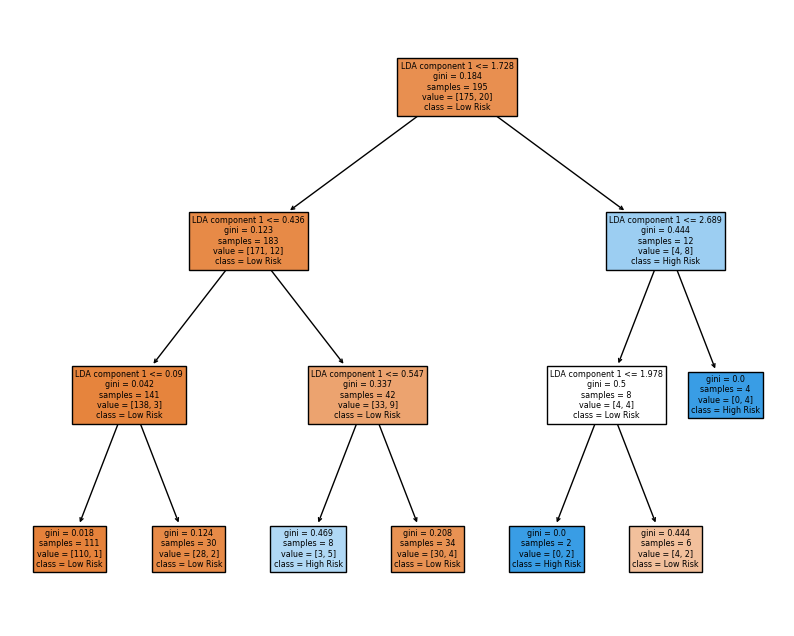

Precision: 0.84, Recall: 0.92, F1-score: 0.88


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#@title LDA & Decision Tree Plot { vertical-output: true }
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# X = pv[[	'Median Income',	'Diversity Index',	'Property Value', 'POC %', 'DomRace']]
# y = pv['Risk']

X = no_zip[[	'Median Income',	'Diversity Index',	'Property Value', 'POC %', 'DomRace']]
y = no_zip['Risk']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Assuming X_train and y_train are your training data and labels
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_lda, y_train)

plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=['LDA component 1', 'LDA component 2'], class_names=['Low Risk', 'High Risk'])
plt.show()

# # Define the pipeline to combine the LDA and Decision Tree models
pipeline = Pipeline(steps=[('lda', lda), ('dt', clf)])

# # Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# # Test the pipeline on the testing data
y_pred = pipeline.predict(X_test)


from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(precision, recall, f1))


In [ ]:

from sklearn.metrics import classification_report

X = no_zip.drop("Risk", axis=1)
y = no_zip["Risk"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

scores = cross_val_score(dt_classifier, X, y, cv=5)
print('Cross-validation scores:', scores)
print('Mean score:', np.mean(scores))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        45
         1.0       0.33      0.50      0.40         4

    accuracy                           0.88        49
   macro avg       0.64      0.71      0.67        49
weighted avg       0.90      0.88      0.89        49

Accuracy: 0.8775510204081632
Cross-validation scores: [0.83673469 0.59183673 0.93877551 0.89795918 1.        ]
Mean score: 0.8530612244897959


In [ ]:
#@title MAP PREDICTIONS { vertical-output: true }
import folium
import requests
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

geoloc = Nominatim(user_agent='my-app')
pv['location'] = pv['Zip'].apply(lambda x: geoloc.geocode({'postalcode':x, 'country':'USA'}))

pv['latitude'] = pv['location'].apply(lambda x: x.latitude if x else None)
pv['longitude'] = pv['location'].apply(lambda x: x.longitude if x else None)


map = folium.Map(location=[36.1627,-86.7816], zoom_start=12)

for i in range(k):
  cpv = pv[pv['cluster'] == i]
  markers = MarkerCluster().add_to(map)

  for idx, row in cpv.iterrows():
    if row['cluster'] == 2:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='red')).add_to(map)
    elif row['cluster'] == 0:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='blue')).add_to(map)
    else:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='white')).add_to(map)
map



In [ ]:
#@title LDA & Decision Tree Predictions { vertical-output: true }


# initialize the geolocator
geolocator = Nominatim(user_agent="my_app")

# create two new columns in the DataFrame to store the latitude and longitude
no_zip['latitude'] = None
no_zip['longitude'] = None

# iterate over each row in the DataFrame
for index, row in no_zip.iterrows():
    address = row['Census Tract ID'] + ', USA'  # add ', USA' to the end of the Census Tract ID
    location = geolocator.geocode(address)
    if location is not None:
        no_zip.at[index, 'latitude'] = location.latitude  #
        no_zip.at[index, 'longitude'] = location.longitude  #



for i in range(k):
  cpv = no_zip[no_zip['Risk'] == i]
  markers = MarkerCluster().add_to(map)

  for idx, row in no_zip.iterrows():
    if row['Risk'] == 1:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='red')).add_to(map)
    else:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='white')).add_to(map)
map





